# 1. Setup and Data Loading

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


def check():
  print(f'working fine {time.ctime()}')

check()

working fine Tue Oct 21 14:17:23 2025


In [326]:
df = pd.read_csv("data/rwsi_data.csv")
df.head()

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
0,jv3uDyqYltpoXreO,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,Windows,Safari,North America,1.0,Returning,False,No
1,eBHG5YGyco8TRlac,4.0,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,February,Android,Chrome,NaN,2.0,Returning,False,No
2,Lz5fuqr91SKGHb5N,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,MacOS,Safari,Other,3.0,Returning,False,No
3,cyOsumxkpNEvKIdc,4.0,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,February,iOS,NaN,Europe,4.0,Returning,False,No
4,F4rTMKOqtoPKzxw9,2.0,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,NaN,February,iOS,Internet Explorer,NaN,4.0,Returning,True,No


In [327]:
df.shape

(12330, 20)

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SessionID              12330 non-null  object 
 1   AdClicks               11467 non-null  float64
 2   InfoSectionCount       11961 non-null  float64
 3   InfoSectionTime        11961 non-null  float64
 4   HelpPageVisits         12084 non-null  float64
 5   HelpPageTime           12084 non-null  float64
 6   ItemBrowseCount        11837 non-null  float64
 7   ItemBrowseTime         11837 non-null  float64
 8   ExitRateFirstPage      12207 non-null  float64
 9   SessionExitRatio       12084 non-null  float64
 10  PageEngagementScore    11961 non-null  float64
 11  HolidayProximityIndex  11837 non-null  float64
 12  VisitMonth             12330 non-null  object 
 13  UserPlatformID         11837 non-null  object 
 14  WebClientCode          11714 non-null  object 
 15  Ma

In [329]:
df.describe()

,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,TrafficSourceCode
count,11467.000000,11961.000000,11961.000000,12084.000000,12084.000000,11837.000000,11837.000000,12207.000000,12084.000000,11961.000000,11837.000000,11714.000000
mean,1.993459,2.318201,80.871460,0.502565,34.420615,31.717749,1196.681677,0.022234,0.043130,5.885423,0.061806,4.069489
std,1.420444,3.326956,177.208946,1.271441,141.209531,44.390208,1918.148954,0.048551,0.048623,18.557293,0.199556,4.031417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000
50%,2.000000,1.000000,8.000000,0.000000,0.000000,18.000000,598.250000,0.003125,0.025222,0.000000,0.000000,2.000000
75%,3.000000,4.000000,92.933333,0.000000,0.000000,38.000000,1469.666667,0.016923,0.050000,0.000000,0.000000,4.000000
max,4.000000,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,20.000000


**Changing the categorical value to numericals**

In [330]:
df['MonetaryConversion'] = df['MonetaryConversion'].map({'Yes': 1, 'No': 0})
df['IsWeekendVisit'] = df['IsWeekendVisit'].astype(int)
df = df.drop('SessionID', axis=1) # sesson id doesn't matter



In [331]:
# numerical_cols except target and is weekend visit

numerical_cols = [
    'AdClicks',
    'InfoSectionCount',
    'InfoSectionTime',
    'HelpPageVisits',
    'HelpPageTime',
    'ItemBrowseCount',
    'ItemBrowseTime',
    'ExitRateFirstPage',
    'SessionExitRatio',
    'PageEngagementScore',
    'HolidayProximityIndex',
]

categorical_cols = [
    'UserPlatformID',
    'WebClientCode',
    'MarketZone',
    'TrafficSourceCode',
    'UserCategory'
]

# Handling missing values

In [332]:
for col in numerical_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

print(df.isnull().sum().sum())

0


In [333]:
df.isnull().sum()

AdClicks                 0
InfoSectionCount         0
InfoSectionTime          0
HelpPageVisits           0
HelpPageTime             0
ItemBrowseCount          0
ItemBrowseTime           0
ExitRateFirstPage        0
SessionExitRatio         0
PageEngagementScore      0
HolidayProximityIndex    0
VisitMonth               0
UserPlatformID           0
WebClientCode            0
MarketZone               0
TrafficSourceCode        0
UserCategory             0
IsWeekendVisit           0
MonetaryConversion       0
dtype: int64

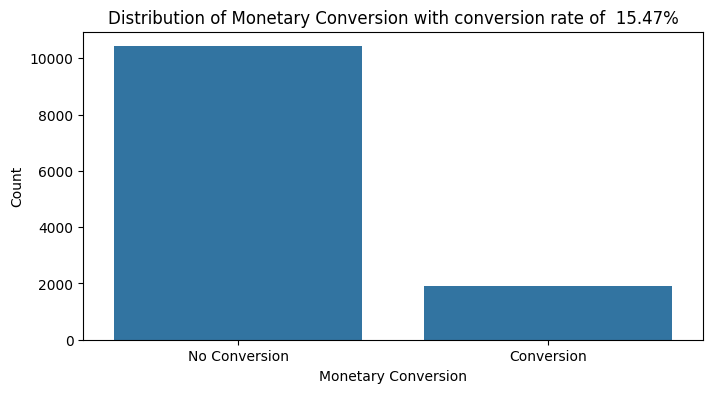

In [334]:
conversion_rate = df['MonetaryConversion'].sum() / len(df) * 100

plt.figure(figsize=(8, 4))
sns.countplot(x='MonetaryConversion', data=df)
plt.title(f'Distribution of Monetary Conversion with conversion rate of {conversion_rate : .2f}%')
plt.xlabel('Monetary Conversion')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Conversion', 'Conversion'])
plt.show()

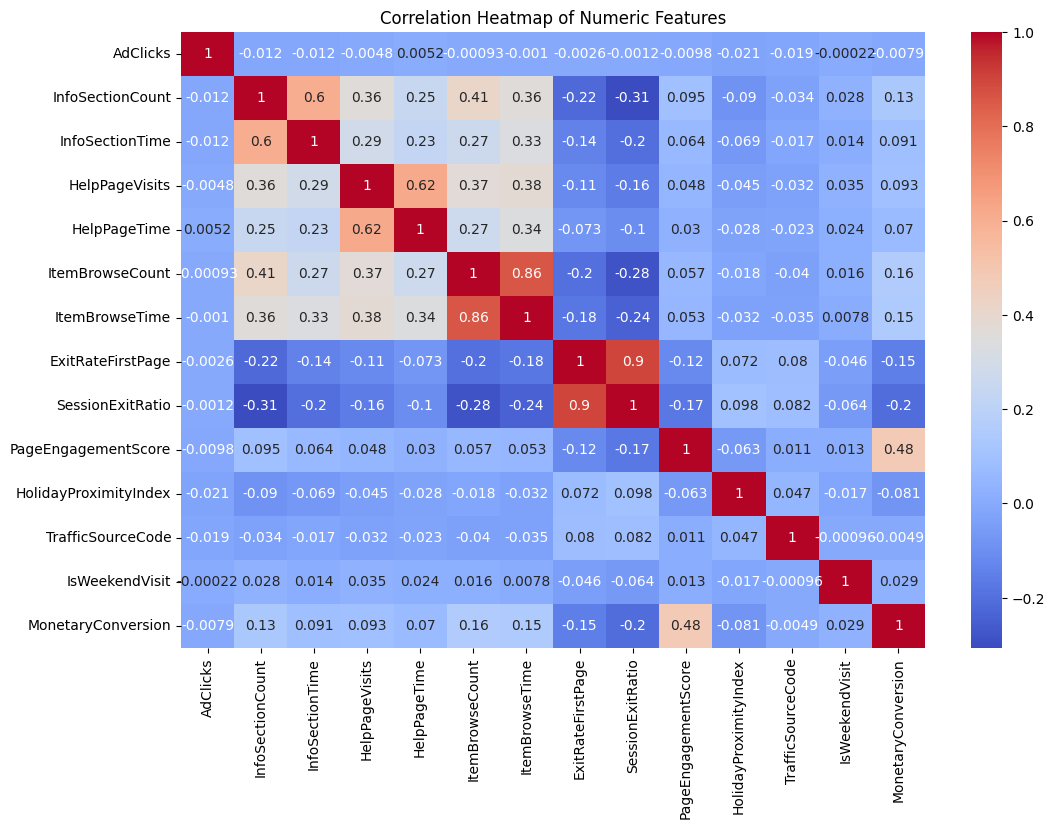

MonetaryConversion       1.000000
PageEngagementScore      0.482922
ItemBrowseCount          0.156485
ItemBrowseTime           0.148637
InfoSectionCount         0.134383
HelpPageVisits           0.093436
InfoSectionTime          0.091048
HelpPageTime             0.069811
IsWeekendVisit           0.029295
TrafficSourceCode       -0.004894
AdClicks                -0.007923
HolidayProximityIndex   -0.080604
ExitRateFirstPage       -0.149823
SessionExitRatio        -0.204889
Name: MonetaryConversion, dtype: float64


In [335]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()
# Check correlation with target
print(corr['MonetaryConversion'].sort_values(ascending=False))

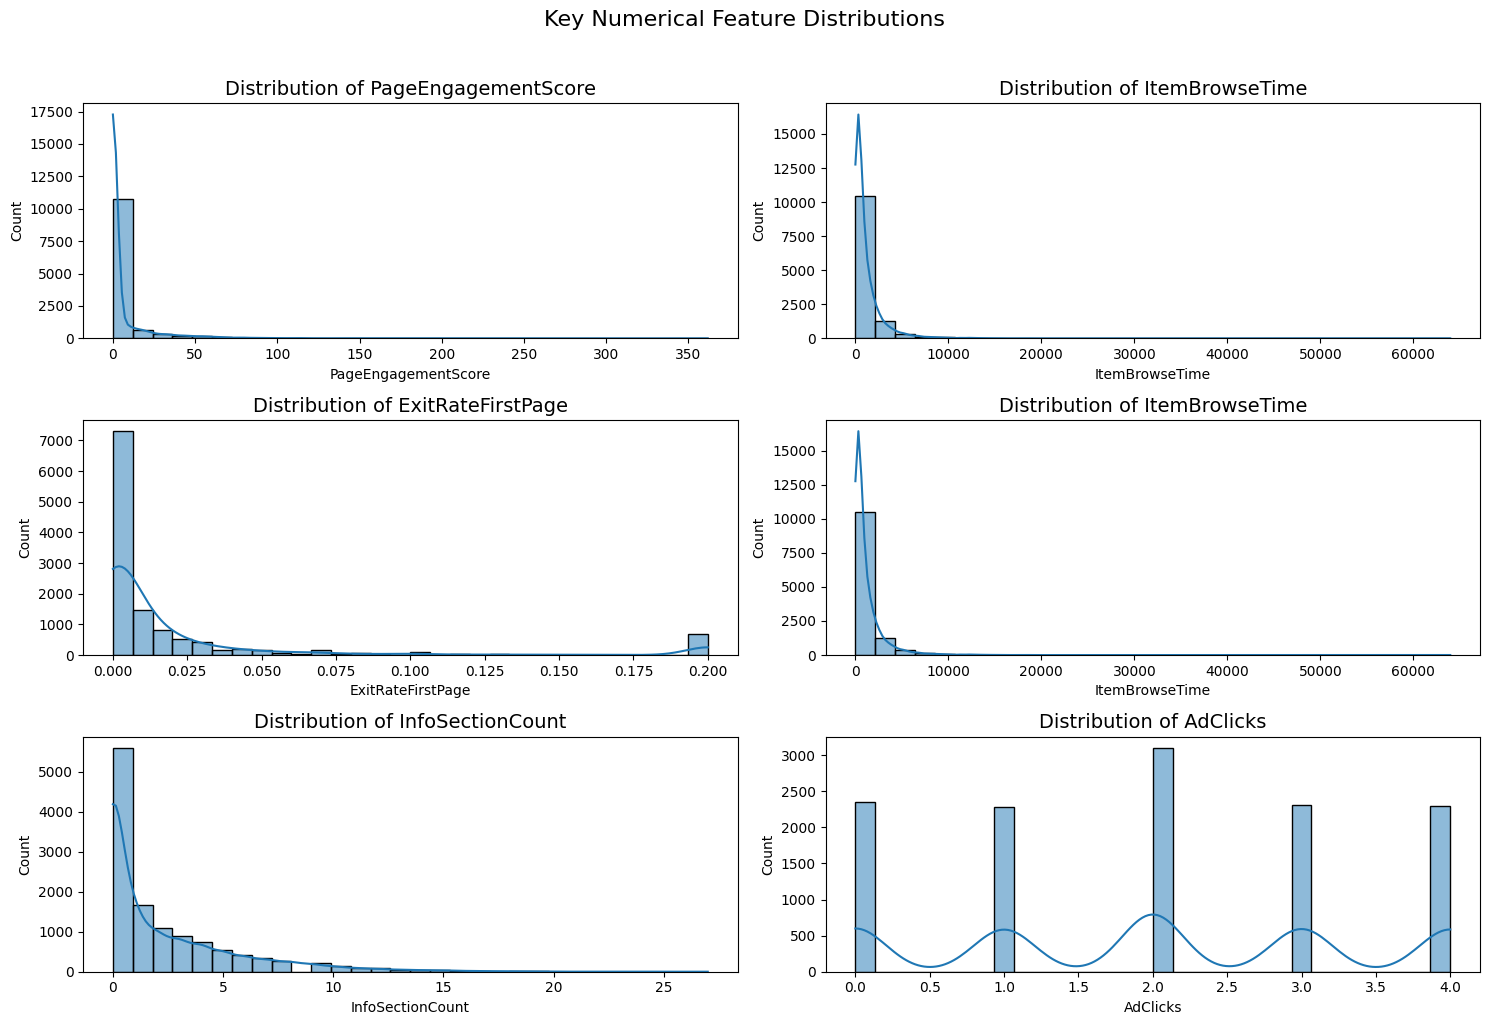

In [336]:
# top numerical corelated columns expect adclicks
numerical_features = ['PageEngagementScore', 'ItemBrowseTime',  'ExitRateFirstPage', 'ItemBrowseTime', 'InfoSectionCount', 'AdClicks']

# Plotting distributions (histograms)
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)

plt.suptitle('Key Numerical Feature Distributions', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

**Dropping the use less coluns again**

In [337]:
column_to_drop = ['TrafficSourceCode','AdClicks','HolidayProximityIndex', 'ExitRateFirstPage', 'SessionExitRatio']
for col in column_to_drop:
    df.drop(col,axis=1, inplace=True)

In [338]:
df.head()

,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,PageEngagementScore,VisitMonth,UserPlatformID,WebClientCode,MarketZone,UserCategory,IsWeekendVisit,MonetaryConversion
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,February,Windows,Safari,North America,Returning,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.0,February,Android,Chrome,North America,Returning,0,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,February,MacOS,Safari,Other,Returning,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.0,February,iOS,Chrome,Europe,Returning,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.0,February,iOS,Internet Explorer,North America,Returning,1,0


In [339]:
df.head()

,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,PageEngagementScore,VisitMonth,UserPlatformID,WebClientCode,MarketZone,UserCategory,IsWeekendVisit,MonetaryConversion
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,February,Windows,Safari,North America,Returning,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.0,February,Android,Chrome,North America,Returning,0,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,February,MacOS,Safari,Other,Returning,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.0,February,iOS,Chrome,Europe,Returning,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.0,February,iOS,Internet Explorer,North America,Returning,1,0


In [340]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [341]:
X = df.drop('MonetaryConversion', axis=1)
y = df['MonetaryConversion']

numerical_cols_final = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols_final = X.select_dtypes(include='object').columns.tolist()

# 1. One-Hot Encode Categorical Features
X_encoded = pd.get_dummies(X, columns=categorical_cols_final, drop_first=True)

# Update numerical columns list after encoding to include all relevant ones
all_numerical_cols = [col for col in X_encoded.columns if col in numerical_cols_final]
# 2. Split Data (Stratified to handle class imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.25, random_state=28, stratify=y
)

# 3. Scaling Numerical Features
scaler = StandardScaler()
X_train[all_numerical_cols] = scaler.fit_transform(X_train[all_numerical_cols])
X_test[all_numerical_cols] = scaler.transform(X_test[all_numerical_cols])

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (9247, 46), Test set shape: (3083, 46)


In [342]:
model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [343]:
y_pred = model.predict(X_test)


In [344]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [345]:
print("For Logistic Regresson")

print("accuracy:", accuracy_score(y_test, y_pred))
print("\n=============================================================================\n")
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n=============================================================================\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

For Logistic Regresson
accuracy: 0.8760947129419396


 Confusion Matrix:
 [[2529   77]
 [ 305  172]]


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2606
           1       0.69      0.36      0.47       477

    accuracy                           0.88      3083
   macro avg       0.79      0.67      0.70      3083
weighted avg       0.86      0.88      0.86      3083



# Random forest

In [346]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print("For Random forest")

print("accuracy:", accuracy_score(y_test, y_pred))
print("\n=============================================================================\n")
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n=============================================================================\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

For Random forest
accuracy: 0.8916639636717483


 Confusion Matrix:
 [[2509   97]
 [ 237  240]]


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      2606
           1       0.71      0.50      0.59       477

    accuracy                           0.89      3083
   macro avg       0.81      0.73      0.76      3083
weighted avg       0.88      0.89      0.88      3083

